# Importations

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time

# Utils

In [150]:
def plot_function(f):
    precision = 100000
    x_axis = np.linspace(-10, 10, precision).reshape((precision, 1))
    y_axis = f(x_axis)
    plt.figure(figsize=(20, 10))
    plt.xlim(-0.5, 2.5)
    plt.ylim(-5, 20)
    plt.grid()
    plt.plot(x_axis, y_axis)
    plt.show()

# Function

In [154]:
def f(x):
    y = (np.sin(10 * np.pi * x) / (2 * x)) + (x - 1)**4
    return y

In [155]:
def df(x):
    y = (10*np.pi*np.cos(10*np.pi*x) / 2*x) + (np.sin(10 * np.pi * x) * (0.5 * (-1/x**2))) + 4*x**3
    return y

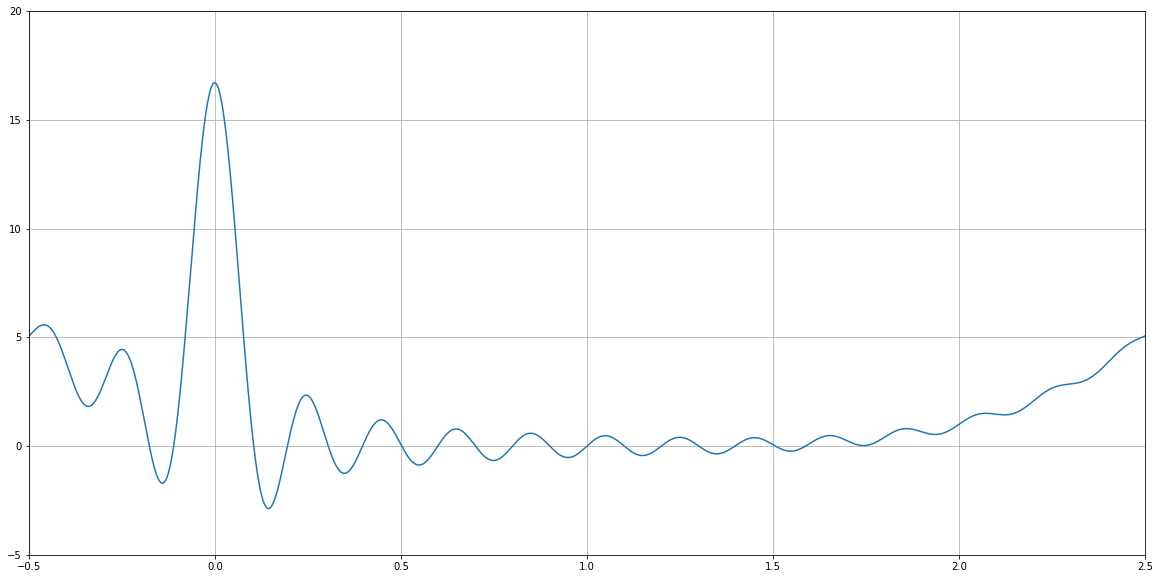

In [156]:
plot_function(f)

# Gradient Descent

Initialization : 0.2586174883938408
Time spend : 392.1055793762207 ms
Final value : 0.3256661248759182 -0.9013351310032044


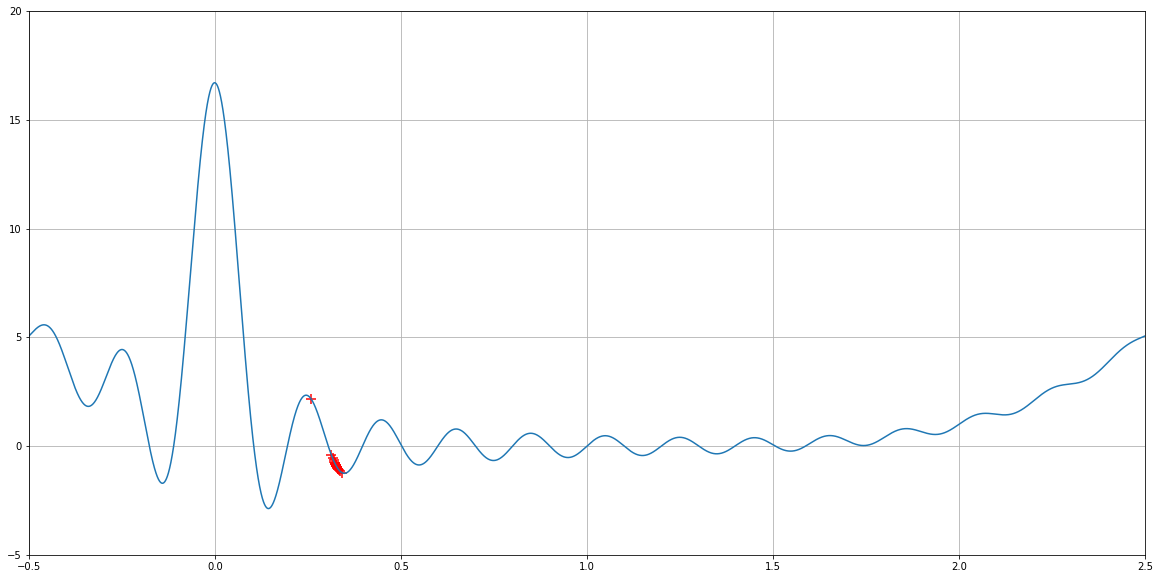

In [186]:
# Learning parameters
nb_epochs = 100000
learning_rate = 0.01

# Initialization
x0 = np.random.uniform(-0.5, 2.5)
x_list = [x0]
print('Initialization :', x0)

# Gradient descent
start = time.time()
for i in range(nb_epochs):
    dx = df(x0)
    x0 = x0 - learning_rate * dx
    x_list.append(x0)
end = time.time()
print('Time spend :', (end - start) * 1000, 'ms')
print('Final value :', x0, f(x0))

# Display result
x_list = np.array(x_list)
precision = 100000
x_axis = np.linspace(-10, 10, precision).reshape((precision, 1))
y_axis = f(x_axis)
plt.figure(figsize=(20, 10))
plt.xlim(-0.5, 2.5)
plt.ylim(-5, 20)
plt.grid()
plt.plot(x_axis, y_axis)
plt.scatter(x_list, f(x_list), s=100, c='r', marker='+')
plt.show()

# Evolution Strategies

Time spend : 4937.123775482178 ms
Final value : 0.1437791738277379 -2.8738989416296277


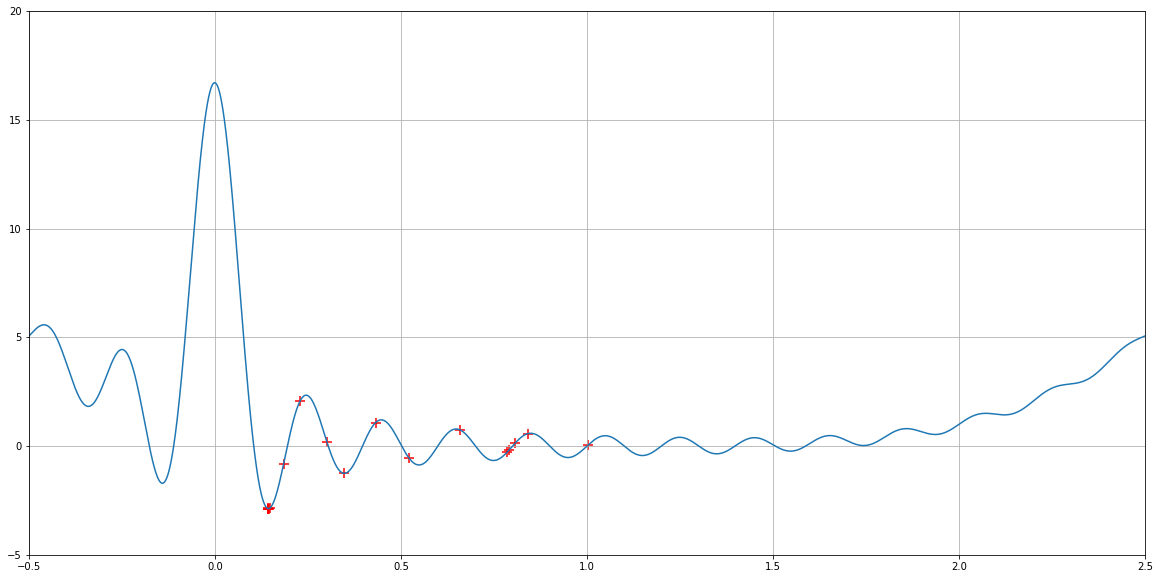

In [185]:
# Learning parameters
nb_pop = 50
prop_chosen = 0.25
nb_epochs = 100000

# Initialization
x0 = np.random.uniform(-10, 10)
mu0, sig0 = x0, 1
x_list = []
x_list.append(mu0)

# Evolution strategy
start = time.time()
for i in range(nb_epochs):
    # Generate population
    gen0 = np.random.randn(nb_pop)*np.sqrt(sig0) + mu0
    
    # Evaluate population
    fitness_scores = f(gen0)
    
    # Get best individuals
    res = sorted(zip(fitness_scores, gen0))
    nb_survivor = int(prop_chosen * len(gen0))
    res = res[:nb_survivor]
    res = np.array(res)
    x0_best = res[:, 1]
    
    # Update mean and variance of the next generation
    tmp = mu0
    mu0 = np.mean(x0_best)
    sig0 = np.sum((x0_best - tmp)**2) / nb_survivor
    x_list.append(mu0)
end = time.time()
print('Time spend :', (end - start) * 1000, 'ms')
print('Final value :', mu0, f(mu0))

# Display result
x_list = np.array(x_list)
precision = 100000
x_axis = np.linspace(-10, 10, precision).reshape((precision, 1))
y_axis = f(x_axis)
plt.figure(figsize=(20, 10))
plt.xlim(-0.5, 2.5)
plt.ylim(-5, 20)
plt.grid()
plt.plot(x_axis, y_axis)
plt.scatter(x_list, f(x_list), s=100, c='r', marker='+')
plt.show()